# Estimate your personal carbon emissions
**Uses the formula presented in "Being the Change" by Dr. Peter Kalmus (Pages 162 and 163). Each section contains a function to calculate emissions from a certain component of your daily life. Example values are entered into the functions as arguments. Simply replace them as shown in the examples.** 

**To run all cells, get a final total emissions value, and plot a breakdown of your emissions by category, go to the "Cell" dropdown menu above and click "Run All".**

In [1]:
# Import necessary python packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Planes

In [2]:
def plane_emissions(coach, first):
    """Calculates emissions from air travel."""
    
    # Conversion factores in units of kg CO2e
    coach_conversion = 0.8
    first_conversion = 1.5
    
    total_planes = (coach*coach_conversion) + (first*first_conversion)
    
    return total_planes

**Enter your total miles flown in coach and your total miles flown in first class.**

In [3]:
total_planes = plane_emissions(coach=2000, first=1000)

## Driving

In [4]:
def driving_emissions(fuel_types, miles, mpg):
    """Calculates emissions from driving."""
    
    # Conversion factores in units of kg CO2 per mile
    diesel_conversion = 12.1
    gasoline_conversion = 11.3
    
    cumulative = []
    
    # Sum over all the vehicles, accounting for fuel type, mpg, miles. 
    for i in range(len(fuel_types)): 
        gallons = miles[i]/mpg[i]
        
        if fuel_types[i] == "diesel":
            CO2e = diesel_conversion*gallons
            cumulative.append(CO2e)
            
        elif fuel_types[i] == "gasoline":
            CO2e = gasoline_conversion*gallons
            cumulative.append(CO2e)
            
        else:
            print("Your car must be gasoline or diesel!")

    total_driving = np.sum(cumulative)
    
    return total_driving

**Enter a list of fuel_types by vehicle as in this example: ["gasoline", "gasoline", "diesel"]**

**Enter a list of miles driven by vehicle as in this example: [1000, 5000, 500]**

**Enter a list of mpg fuel efficiencies by vehicle as in this example: [25, 40, 35]**

In [ ]:
total_driving = driving_emissions(miles=[10000], mpg=[30], fuel_types = ["gasoline"])

## Intercity trains and buses

In [6]:
def trains_buses(bus_miles, train_miles):
    """Calculates total emissions from miles ridden on trains and buses."""
    
    # Conversion factores in units of kg CO2 per mile
    train_conversion = 0.16
    bus_conversion = 0.065
    
    # Calculate the sum of train and bus emissions
    total_trains_buses = (bus_conversion*bus_miles) + (train_conversion*train_miles)
    
    return total_trains_buses

**Enter your total bus miles and total train miles.** 

In [7]:
total_trains_buses = trains_buses(bus_miles=10000, train_miles=0)

## Natural gas


In [8]:
def natural_gas(gas_used, num_people_household):
    """Calculates total emissions from natural gas usage."""
    
    # Conversion factores in units of kg CO2e per therm
    natgas_conversion = 13
    
    # Calculate the sum of train and bus emissions
    
    if gas_used > 0:
        total_natgas = (gas_used/num_people_household)*natgas_conversion
        
    else:
        total_natgas = 0
    
    return total_natgas

**Enter the total gas used (estimated from your utility bills) and the number of people in your household.**

In [9]:
total_natgas = natural_gas(gas_used=1000, num_people_household=2)

## Food

In [10]:
def food(diet_type, sustainable_fraction):
    """Estimate emissions from the diet."""
    
    # Conversion factors in units of kg CO2e per year
    meat_conversion = 3000
    vegetarian_conversion = 1500
    vegan_conversion = 1000
    
    if diet_type == "meat":
        total_food = meat_conversion - (sustainable_fraction*meat_conversion)
        
    elif diet_type == "vegetarian":
        total_food = vegetarian_conversion - (sustainable_fraction*vegetarian_conversion)
        
    elif diet_type == "vegan":
        total_food = vegan_conversion - (sustainable_fraction*vegan_conversion)
        
    else:
        print("You must eat something!")
        
        
    return total_food


**Enter your diet type as either "meat", "vegetarian", or "vegan". Spelling matters!** 

**Also enter the "sustainable fraction" of your diet, i.e. the amount taken from your garden or freeganism.**

In [11]:
total_food = food(diet_type="meat", sustainable_fraction=0)

## Electricity


In [12]:
def electricity(kWh_used, num_people_household):
    """Estimate annual emissions from electricity usage."""
    
    # Conversion factor in units of kg CO2e per kWh
    electricity_conversion = 0.9
    
    # Calculate the total emissions 
    total_electricity = (kWh_used/num_people_household)*electricity_conversion
    
    return total_electricity
    

**Enter the kWh used by your household (estimated from your utility bills) and the number of people in your
household.**

In [13]:
total_electricity = electricity(kWh_used=10000, num_people_household=2)

## Waste


In [14]:
def waste(fraction_secondhand, compost_all_food, compost_all_yard):
    """Estimate annual emissions from waste using average values."""
    
    # Average estimates of waste emissions in units of kg CO2e per year
    food_yard = 700
    sewage = 150
    paper = 300 # assuming that you recycle paper waste! 
    textiles = 300
    
    if compost_all_food == True and compost_all_yard == True:    
        total_waste = (food_yard - 400) + sewage + paper + (textiles - (textiles*fraction_secondhand))
        
    elif compost_all_food == True and compost_all_yard == False:
        total_waste = (food_yard - 200) + sewage + paper + (textiles - (textiles*fraction_secondhand))
        
    elif compost_all_food == False and compost_all_yard == True:
        total_waste = (food_yard - 200) + sewage + paper + (textiles - (textiles*fraction_secondhand))
        
    else:
        print("Please double-check the information you've entered.")
        
        
    return total_waste
        

**Enter the "fraction_secondhand", the fraction of your textiles purchase seconhand.** 

**Also enter whether you compost all food waste as "True" of "False".**

**Also enter whether you compost all yard waste as "True" of "False".**

In [15]:
total_waste = waste(fraction_secondhand=0.5, compost_all_food=False, compost_all_yard=True)

## New stuff

In [16]:
def new_stuff(us_dollars):
    """Estimate the emissions that result from purchasing new stuff."""
    
    # Conversion factor in units of kg CO2e per US dollar
    stuff_conversion = 0.5
    
    total_new_stuff = stuff_conversion*us_dollars
    
    return total_new_stuff

**Enter the amount of money you spend annually on new stuff (in US dollars).**

In [17]:
total_new_stuff = new_stuff(us_dollars=2000)

# Put it all together! 

**Run this to sum up all of your emissions and give you a final total!** 

In [25]:
components = [total_planes, total_driving, total_trains_buses, total_natgas, total_food, total_electricity, total_new_stuff, total_waste]

def sum_it_all_up(components):
    """Calculate the total annual CO2 emissions from the estimates of individual components."""
    
    total_emissions = np.sum(components)
    total_emissions = np.round(total_emissions, decimals=1)
    
    return total_emissions

In [26]:
total_emissions = sum_it_all_up(components)

## Breakdown of your emissions by category

Your total annual CO2 emissions amount to 23616.7 kg.


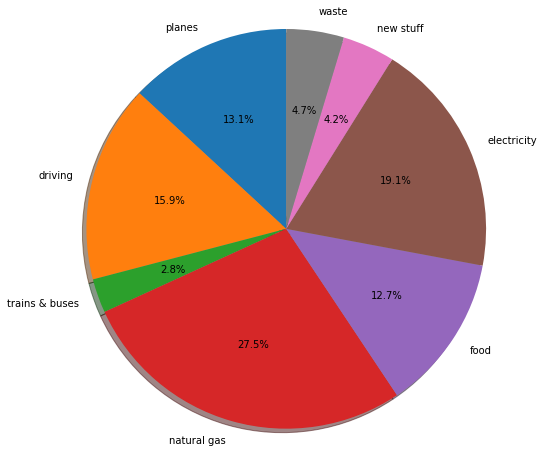

In [28]:
print("Your total annual CO2 emissions amount to " + str(total_emissions) + " kg.")

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8, 8)

labels = ["planes", "driving", "trains & buses", "natural gas", "food", "electricity", "new stuff", "waste"]

ax1.pie(components, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()